In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# slope and y intercept of the given equation (3x1 + 4x2 - 10 = 0): m--> slope, b--> y intercept (derivation in the report)

m, c = -0.75, 2.5

In [3]:
# Function for line equation y = mx + c

def y(x, slop, C):
    return slop*x + C

In [4]:
# Generating 200 random samples above and below the line. To generate samples gaussian noise (mean = 25, 
# standard deviation = 5) has been added and substracted from the line equation.

X = np.linspace(0, 35, 200)          # random x values

y_above = [y(x, m, c) + abs(random.gauss(25,5)) for x in X]      # y values above the line
y_below = [y(x, m, c) - abs(random.gauss(25,5)) for x in X]      # y values below the line

In [5]:
# 3x1 + 4x2 - 10 = 0 line equation

Y = m*X + c

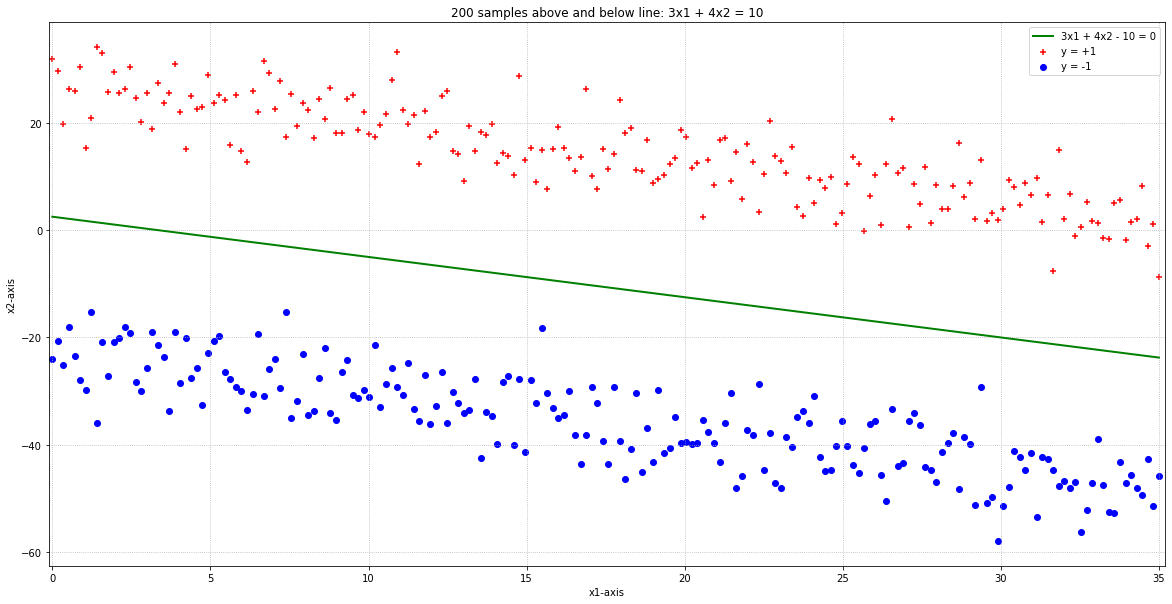

In [6]:
#----------------------------------------------------------------------- Task - 2 ------------------------------------------


# Plotting the line and all the positive samples with "+" and all the negative samples with "o"

fig = plt.figure(figsize = (20, 10))

plt.plot(X,Y, 'g', linewidth = 2, label ='3x1 + 4x2 - 10 = 0')      # plotting original line 

plt.scatter(X, y_above, marker='+', c='r', label = "y = +1")        # plotting positive samples
plt.scatter(X, y_below, marker='o', c='b', label = "y = -1")        # plotting negative samples

plt.legend(fontsize=10)

plt.grid(True, linestyle =':')
plt.xlim([-0.1, 35.2])

plt.title('200 samples above and below line: 3x1 + 4x2 = 10')
plt.xlabel('x1-axis')
plt.ylabel('x2-axis')
plt.show()

In [7]:
### Creating the dataset and corresponding labels

# converting the positive and negative samples to array and reshaping
y_positive = np.array(y_above).reshape(200,1)
y_negative = np.array(y_below).reshape(200,1)
X1 = X.reshape(200,1)

# concatinating x and y values 
pos_class = np.concatenate((X1, y_positive), axis=1)
neg_class = np.concatenate((X1, y_negative), axis=1)

# creating labels: +1 for positive class and -1 for negative class
pos_label = np.ones((200,1), dtype=int)
neg_label = np.ones((200,1), dtype=int) * -1

# concatinating the labels with each class separately
data_pos = np.concatenate((pos_class, pos_label), axis=1)
data_neg = np.concatenate((neg_class, neg_label), axis=1)

# concatinating positive and negative dataset
data_set = np.concatenate((data_pos, data_neg), axis=0)


In [8]:
# visualizing dataset type and shape. Dataset have 400 samples (200 positive + 200 negative) and corresponding labels

print(type(data_set))
print(data_set.shape)

<class 'numpy.ndarray'>
(400, 3)


In [9]:
#----------------------------------------------------------- Task - 1 -----------------------------------------------------

# ------------------ Perceptron Algorithm--------------------

def perceptron(data_set, epochs):
    
    # step -1: setting all the parameters
    output = 0
    w = [0, 0]   # weight
    bias = 1
    threshold = 0
    learning_rate = 0.01
    
    
    # iteration
    for k in range(1, epochs):
        hits = 0
        print("\n--------------------------Epoch"+ str(k) + "------------------------------")
        
        for i in range(0, len(data_set)):
            sum = 0
            
            # weighted sum
            for j in range(0, len(data_set[i]) - 1):
                sum += data_set[i][j] * w[j]
                
            #Output = Bias + weighted sum
            output = bias + sum
            
            # Apply step function: {value>0 : 1, else: -1}
            
            if output > threshold:
                y = 1
            else:
                y = -1
            
            
            # if the output doesn't match with the desired output then update
            
            if y == data_set[i][2]:
                hits += 1
                
            else:
                for j in range(0, len(w)):
                    w[j] = w[j] + (learning_rate * data_set[i][2] * data_set[i][j])
                bias = bias + learning_rate * data_set[i][2]
                
        print("\n Updated weight: " + str(w)+ " Updated bias: " +str(bias))
        
    return w, bias, k



In [10]:
#----------------------------------------------- Task - 3 -----------------------------------------------------

# --------------------------------  Perceptron line -----------------------------------------

# calculating slope of the perceptron line using equation: m1 = -(w1/w2)   (derivation in the report)
# calculating y intercept of the perceptron line using equation: b1 = -(bias/w2)   (derivation in the report)

def Perceptron_line(w, bias):
    m1 = -w[0]/w[1]
    c1 = -bias/w[1]
    
    #Perceptron line
    Y1 = m1*X + c1
    
    return Y1

In [11]:
# Running for 1 epoch
w, bias, k = perceptron(data_set, 2)


--------------------------Epoch1------------------------------

 Updated weight: [0.0, 0.2405441876704332] Updated bias: 0.99


In [12]:
# Initial perceptron line
Y1 = Perceptron_line(w, bias)

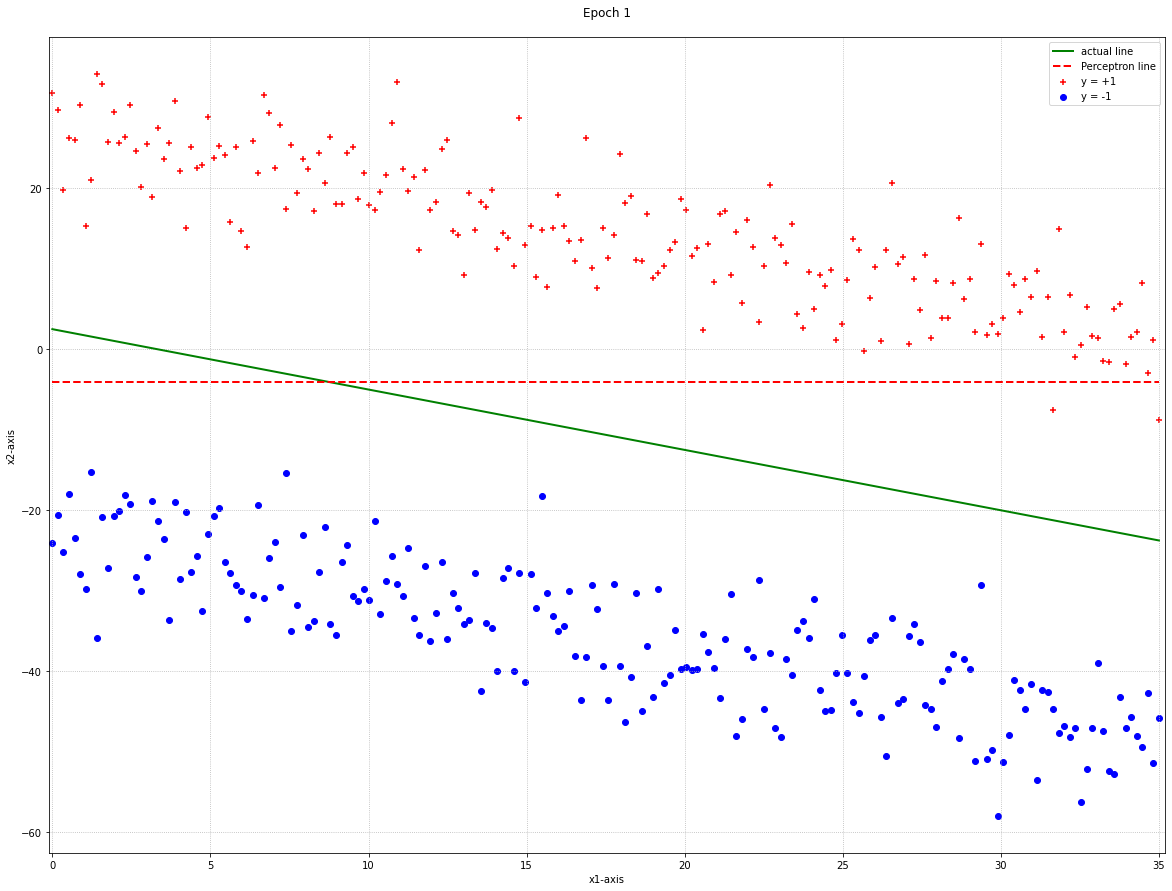

In [13]:
#----------------------------------------------- Task - 3 -----------------------------------------------------

# --------------------------------  Plotting line -----------------------------------------

# Plotting original line in green and initial perceptron line in red

fig = plt.figure(figsize = (20, 15))

plt.plot(X,Y, 'g', linewidth = 2, label ='actual line')
plt.plot(X, Y1, 'r', linewidth = 2, linestyle='dashed', label ='Perceptron line')

plt.scatter(X, y_above, marker='+', c='r', label = "y = +1")
plt.scatter(X, y_below, marker='o', c='b', label = "y = -1")

plt.legend(fontsize=10)

plt.grid(True, linestyle =':')
plt.xlim([-0.1, 35.2])

plt.title('Epoch %s\n'% (str(k)))
plt.xlabel('x1-axis')
plt.ylabel('x2-axis')
plt.show()

In [14]:
# Running for 2 epoch
w, bias, k = perceptron(data_set, 3)


--------------------------Epoch1------------------------------

 Updated weight: [0.0, 0.2405441876704332] Updated bias: 0.99

--------------------------Epoch2------------------------------

 Updated weight: [0.242713567839196, 0.3177877965434691] Updated bias: 0.99


In [15]:
# perceptron line after 2 epochs
Y1 = Perceptron_line(w, bias)

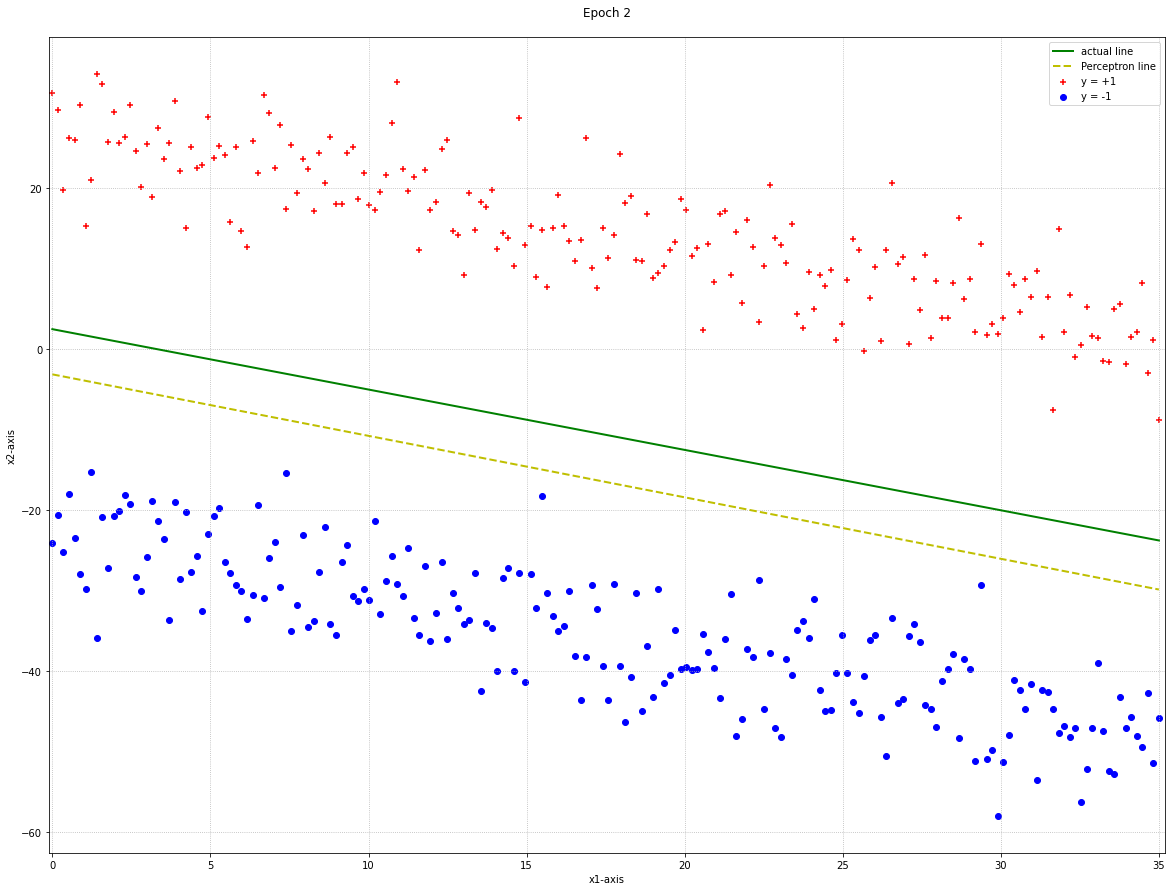

In [16]:
# --------------------------------  Plotting line -----------------------------------------

# Plotting original line in green and intermediate perceptron line in dotted yellow

fig = plt.figure(figsize = (20, 15))

plt.plot(X,Y, 'g', linewidth = 2, label ='actual line')
plt.plot(X, Y1, 'y', linewidth = 2, linestyle='dashed', label ='Perceptron line')

plt.scatter(X, y_above, marker='+', c='r', label = "y = +1")
plt.scatter(X, y_below, marker='o', c='b', label = "y = -1")

plt.legend(fontsize=10)

plt.grid(True, linestyle =':')
plt.xlim([-0.1, 35.2])

plt.title('Epoch %s\n'% (str(k)))
plt.xlabel('x1-axis')
plt.ylabel('x2-axis')
plt.show()

In [17]:
 # Running for 3 epoch
w, bias, k = perceptron(data_set, 4)


--------------------------Epoch1------------------------------

 Updated weight: [0.0, 0.2405441876704332] Updated bias: 0.99

--------------------------Epoch2------------------------------

 Updated weight: [0.242713567839196, 0.3177877965434691] Updated bias: 0.99

--------------------------Epoch3------------------------------

 Updated weight: [0.242713567839196, 0.3177877965434691] Updated bias: 0.99


In [18]:
# perceptron line after 3 epochs
Y1 = Perceptron_line(w, bias)

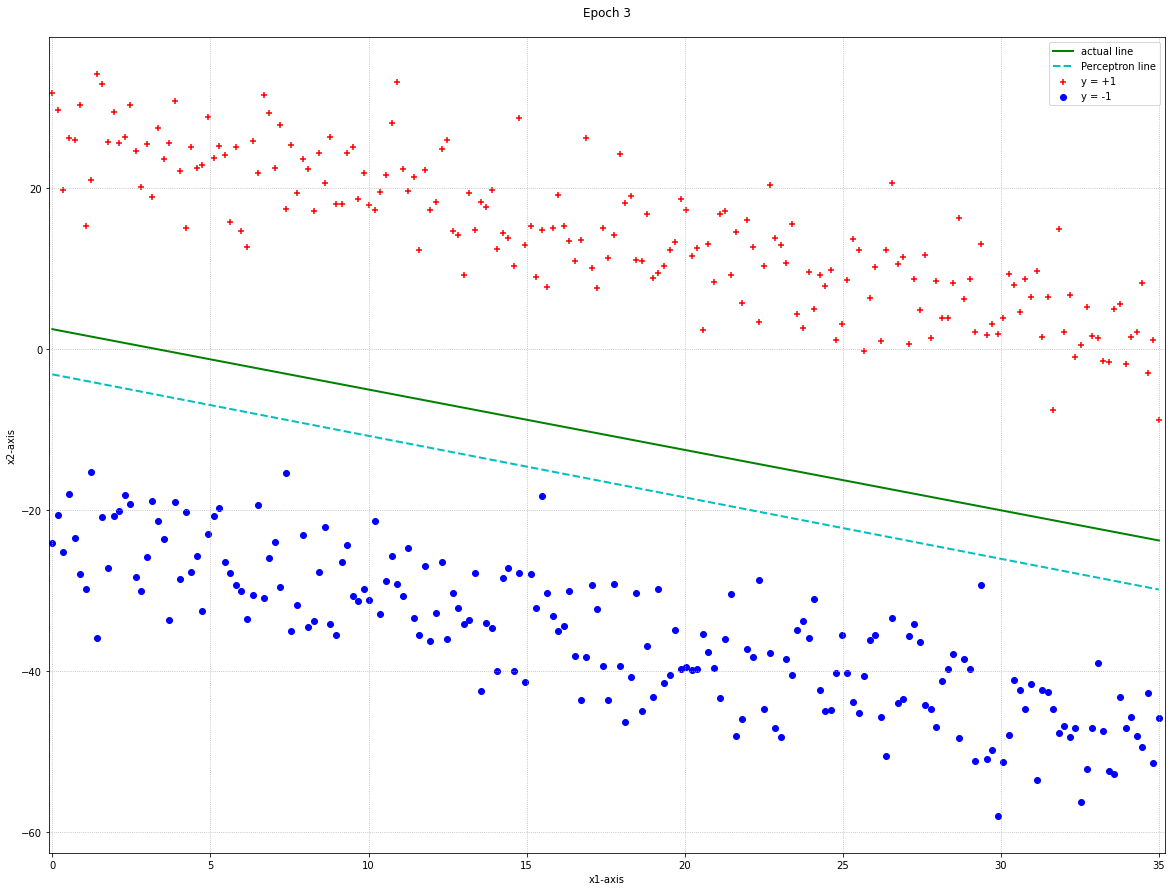

In [19]:
# --------------------------------  Plotting line -----------------------------------------

# Plotting original line in green and intermediate perceptron line in dotted cyan

fig = plt.figure(figsize = (20, 15))

plt.plot(X,Y, 'g', linewidth = 2, label ='actual line')
plt.plot(X, Y1, 'c', linewidth = 2, linestyle='dashed', label ='Perceptron line')

plt.scatter(X, y_above, marker='+', c='r', label = "y = +1")
plt.scatter(X, y_below, marker='o', c='b', label = "y = -1")

plt.legend(fontsize=10)

plt.grid(True, linestyle =':')
plt.xlim([-0.1, 35.2])

plt.title('Epoch %s\n'% (str(k)))
plt.xlabel('x1-axis')
plt.ylabel('x2-axis')
plt.show()

In [20]:
 # Running for 10 epoch
w, bias, k = perceptron(data_set, 11)


--------------------------Epoch1------------------------------

 Updated weight: [0.0, 0.2405441876704332] Updated bias: 0.99

--------------------------Epoch2------------------------------

 Updated weight: [0.242713567839196, 0.3177877965434691] Updated bias: 0.99

--------------------------Epoch3------------------------------

 Updated weight: [0.242713567839196, 0.3177877965434691] Updated bias: 0.99

--------------------------Epoch4------------------------------

 Updated weight: [0.242713567839196, 0.3177877965434691] Updated bias: 0.99

--------------------------Epoch5------------------------------

 Updated weight: [0.242713567839196, 0.3177877965434691] Updated bias: 0.99

--------------------------Epoch6------------------------------

 Updated weight: [0.242713567839196, 0.3177877965434691] Updated bias: 0.99

--------------------------Epoch7------------------------------

 Updated weight: [0.242713567839196, 0.3177877965434691] Updated bias: 0.99

--------------------------

In [21]:
# perceptron line after 10 epochs
Y1 = Perceptron_line(w, bias)

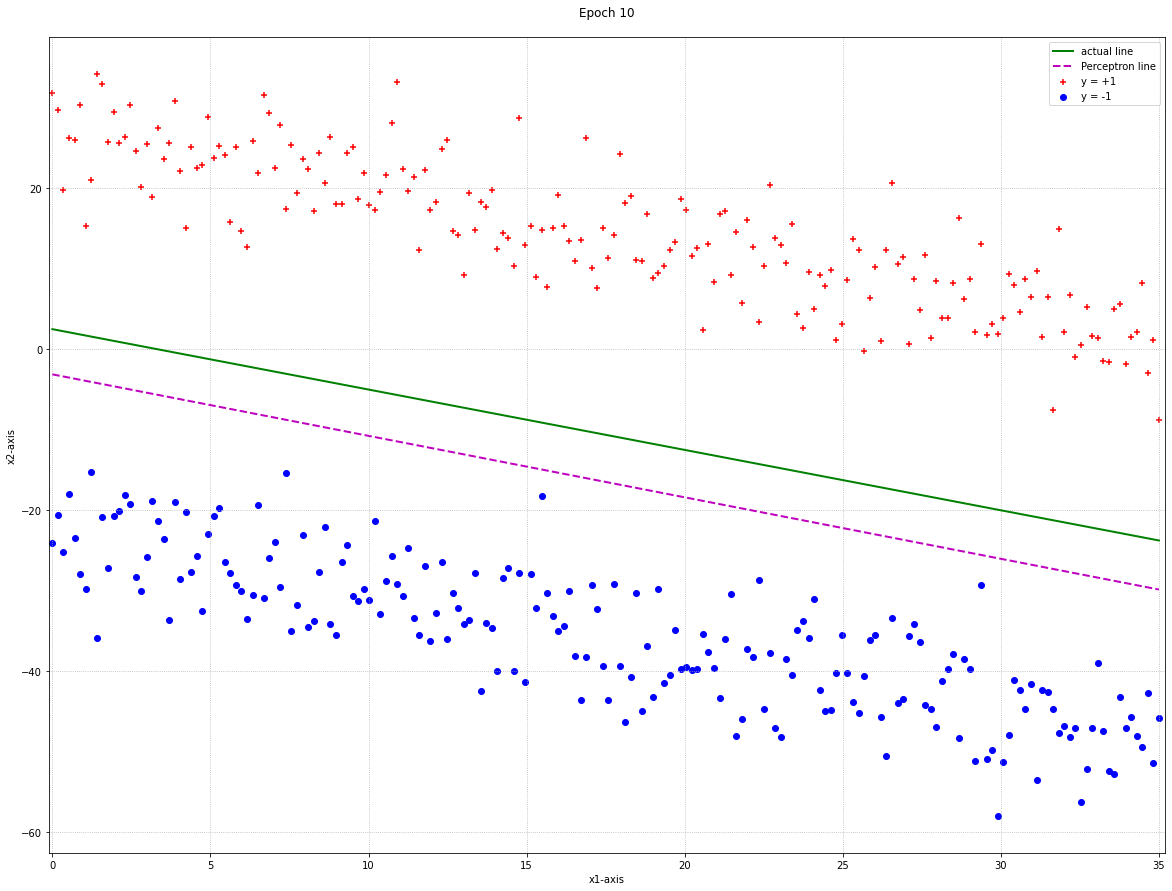

In [22]:
# --------------------------------  Plotting line -----------------------------------------

# Plotting original line in green and intermediate perceptron line in dotted megenta

fig = plt.figure(figsize = (20, 15))

plt.plot(X,Y, 'g', linewidth = 2, label ='actual line')
plt.plot(X, Y1, 'm', linewidth = 2, linestyle='dashed', label ='Perceptron line')

plt.scatter(X, y_above, marker='+', c='r', label = "y = +1")
plt.scatter(X, y_below, marker='o', c='b', label = "y = -1")

plt.legend(fontsize=10)

plt.grid(True, linestyle =':')
plt.xlim([-0.1, 35.2])

plt.title('Epoch %s\n'% (str(k)))
plt.xlabel('x1-axis')
plt.ylabel('x2-axis')
plt.show()